In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [4]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
data.shape

(10324, 33)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [8]:
data.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [9]:
data = data.dropna()

In [10]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,8158.000000,8158.000000,8158.000000,8.158000e+03,8158.000000,8158.000000,8158.000000
mean,56644.616573,80.203972,22091.348492,1.670237e+05,12.408811,0.212851,251.326639
std,31253.921647,81.296579,43990.580533,3.758129e+05,17.059437,0.285822,536.131657
min,108.000000,5.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,21990.250000,30.000000,560.000000,4.221860e+03,3.500000,0.060000,6.500000
50%,73486.000000,60.000000,4427.500000,2.934300e+04,7.645000,0.140000,45.545000
75%,84306.750000,60.000000,24096.750000,1.640927e+05,13.247500,0.260000,239.757500
max,86823.000000,1000.000000,619999.000000,5.951990e+06,306.880000,14.040000,7708.440000


In [11]:
data1 = data.drop(["ID", "Project Code","PQ #","PO / SO #","ASN/DN #"], axis=1)

In [12]:
data1.head()

,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
21,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,7/13/07,2-Oct-07,2-Oct-07,2-Oct-07,...,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
22,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/07,15-Oct-07,15-Oct-07,15-Oct-07,...,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
23,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/07,27-Aug-07,27-Aug-07,27-Aug-07,...,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
29,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/07,20-Nov-07,20-Nov-07,20-Nov-07,...,60,64000,99200.0,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
32,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/19/07,21-Jan-08,21-Jan-08,21-Jan-08,...,30,1000,17000.0,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20


In [13]:
top_10_country = data1["Country"].value_counts()[:10]
top_10_country

South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: Country, dtype: int64

Text(0, 0.5, 'Count')

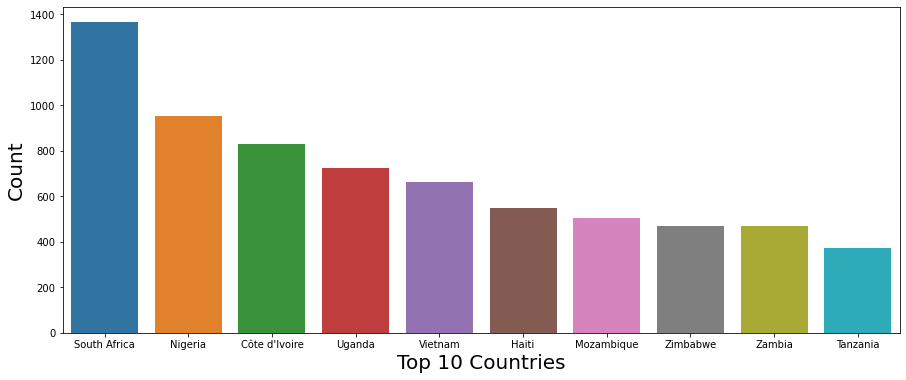

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data1["Country"], order=data1["Country"].value_counts()[:10].index)
plt.xlabel('Top 10 Countries',size=20)
plt.ylabel('Count', size=20)

In [15]:
data1["Fulfill Via"].value_counts()

From RDC       4905
Direct Drop    3253
Name: Fulfill Via, dtype: int64

In [16]:
data1["Vendor INCO Term"].value_counts()

N/A - From RDC    4905
DDP               1379
EXW               1241
FCA                383
CIP                237
DDU                  8
DAP                  5
Name: Vendor INCO Term, dtype: int64

In [17]:
data1["Shipment Mode"].unique()

array(['Air', 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [18]:
data1["Shipment Mode"].value_counts()

Air            4361
Truck          2780
Air Charter     650
Ocean           367
Name: Shipment Mode, dtype: int64

<AxesSubplot:xlabel='Shipment Mode', ylabel='count'>

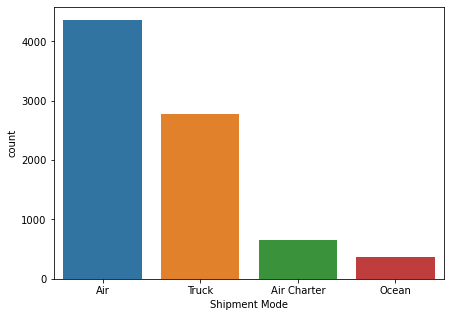

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(data1["Shipment Mode"], order=data1["Shipment Mode"].value_counts().index)

In [20]:
data1["Product Group"].unique()

array(['ARV', 'ACT', 'ANTM'], dtype=object)

In [21]:
data1["Sub Classification"].unique()

array(['Pediatric', 'Adult', 'ACT', 'Malaria'], dtype=object)

In [22]:
data1["Product Group"].value_counts()

ARV     8120
ANTM      22
ACT       16
Name: Product Group, dtype: int64

In [23]:
data1.Vendor.nunique()

42

In [24]:
data1["Item Description"].nunique()

136

In [25]:
data1["Molecule/Test Type"].value_counts()[:10]

Efavirenz                                   1048
Nevirapine                                   841
Lamivudine/Nevirapine/Zidovudine             704
Lamivudine/Zidovudine                        652
Lopinavir/Ritonavir                          600
Lamivudine                                   557
Zidovudine                                   501
Abacavir                                     415
Tenofovir Disoproxil Fumarate                306
Lamivudine/Tenofovir Disoproxil Fumarate     301
Name: Molecule/Test Type, dtype: int64

In [26]:
data1["Brand"].value_counts()[:10]

Generic            6931
Aluvia              231
Kaletra             151
Norvir              129
Truvada              84
Videx                75
Stocrin/Sustiva      50
Isentress            44
Invirase             42
Prezista             42
Name: Brand, dtype: int64

In [27]:
data1["Dosage"][:10]

21       200mg
22     10mg/ml
23    200/50mg
29        30mg
32       300mg
33       300mg
46       600mg
47       200mg
48      1mg/ml
49        25mg
Name: Dosage, dtype: object

In [28]:
data1["Dosage Form"].unique()

array(['Tablet', 'Oral suspension', 'Capsule', 'Powder for oral solution',
       'Chewable/dispersible tablet',
       'Delayed-release capsules - blister', 'Tablet - blister',
       'Tablet - FDC + blister', 'Tablet - FDC + co-blister',
       'Tablet - FDC', 'Oral solution', 'Injection',
       'Delayed-release capsules', 'Chewable/dispersible tablet - FDC',
       'Oral powder'], dtype=object)

In [29]:
data1["Unit of Measure (Per Pack)"].head()

21     60
22    240
23    120
29     60
32     30
Name: Unit of Measure (Per Pack), dtype: int64

In [30]:
data1["Line Item Quantity"]

21         5513
22         1000
23          500
29        64000
32         1000
          ...  
10319    166571
10320     21072
10321    514526
10322     17465
10323     36639
Name: Line Item Quantity, Length: 8158, dtype: int64

In [31]:
data1["Manufacturing Site"].value_counts()[:15]

Aurobindo Unit III, India                                                   2978
Mylan (formerly Matrix) Nashik                                              1407
Hetero Unit III Hyderabad IN                                                 868
Cipla, Goa, India                                                            624
Strides, Bangalore, India.                                                   528
ABBVIE Ludwigshafen Germany                                                  350
ABBVIE (Abbott) Logis. UK                                                    204
BMS Meymac, France                                                           129
Aspen-OSD, Port Elizabeth, SA                                                125
MSD, Haarlem, NL                                                             117
Aurobindo Unit VII, IN                                                       111
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      56
Janssen-Cilag, Latina, IT   

In [32]:
data1["Manufacturing Site"].dtype

dtype('O')

In [33]:
data1["First Line Designation"].value_counts()

Yes    5242
No     2916
Name: First Line Designation, dtype: int64

In [34]:
data1["Weight (Kilograms)"]

21                             2126
22                              941
23                              117
29                             4228
32                               76
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 8158, dtype: object

In [35]:
data1["Freight Cost (USD)"].mode()

0    Freight Included in Commodity Cost
dtype: object

In [36]:
data1["Line Item Insurance (USD)"]

21        224.93
22          3.07
23         65.75
29        158.72
32         27.20
          ...   
10319     705.79
10320     161.71
10321    5284.04
10322     134.03
10323      85.82
Name: Line Item Insurance (USD), Length: 8158, dtype: float64

In [37]:
data1["Delivered to Client Date"].head()

21     2-Oct-07
22    15-Oct-07
23    27-Aug-07
29    20-Nov-07
32    21-Jan-08
Name: Delivered to Client Date, dtype: object

In [38]:
data1["Delivered to Client Date"].tail()

10319    15-Jul-15
10320     6-Aug-15
10321    25-Aug-15
10322     4-Aug-15
10323     4-Aug-15
Name: Delivered to Client Date, dtype: object

In [39]:
data1.columns

Index(['Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [117]:
dataset = data1[['Country', 'Shipment Mode', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)' ]]
dataset = dataset.reset_index().drop('index', axis=1)

In [118]:
dataset

,Country,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,Côte d'Ivoire,Air,60,5513,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93
1,Vietnam,Air,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07
2,Vietnam,Air,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75
3,Ethiopia,Air,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72
4,Vietnam,Air,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...
8153,Zimbabwe,Truck,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
8154,Côte d'Ivoire,Truck,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
8155,Zambia,Truck,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
8156,Zimbabwe,Truck,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [159]:
dataset_grp = dataset.groupby(dataset["Country"])["Pack Price"].sum().nlargest(15)

In [160]:
dataset_grp

Country
South Africa          23479.74
Vietnam               11015.11
Nigeria               10293.74
Côte d'Ivoire         10174.96
Uganda                 9781.99
Mozambique             5782.10
Haiti                  5029.42
Tanzania               4727.47
Zambia                 3780.12
Rwanda                 3721.67
Zimbabwe               3359.62
Guyana                 2209.95
Congo, DRC             2148.15
Ethiopia               1202.37
Dominican Republic     1089.23
Name: Pack Price, dtype: float64

Text(0, 0.5, 'Total Pack Price')

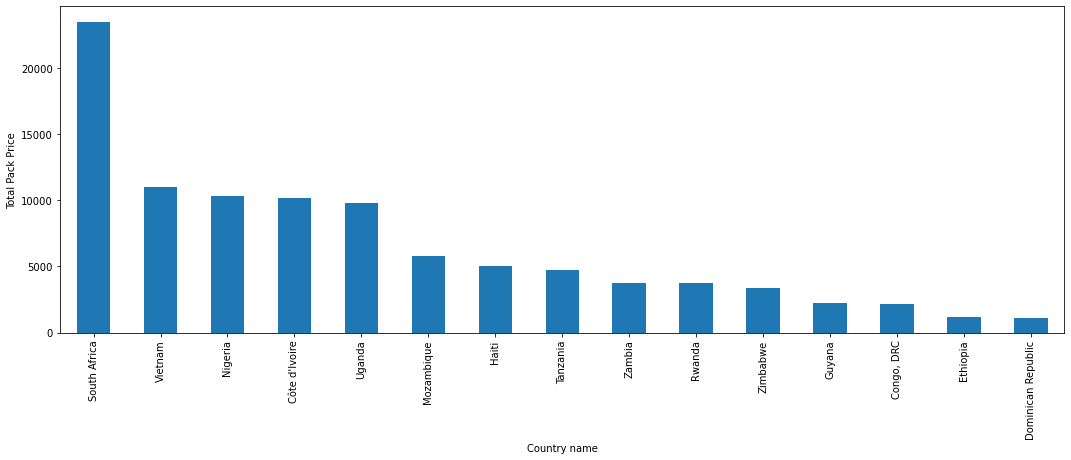

In [172]:
plt.figure(figsize=(18,6))
dataset_grp = dataset.groupby(dataset["Country"])["Pack Price"].sum().nlargest(15).plot(kind='bar')
plt.xlabel("Country name")
plt.ylabel("Total Pack Price")

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split